In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(32,32,3), kernel_size=(3,3),
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 37s 11ms/step - loss: 1.8528 - accuracy: 0.3177 - val_loss: 1.2323 - val_accuracy: 0.5700
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 1.3186 - accuracy: 0.5345 - val_loss: 1.0804 - val_accuracy: 0.6294
Epoch 3/30
391/391 [==============================] - 4s 10ms/step - loss: 1.1841 - accuracy: 0.5822 - val_loss: 1.0330 - val_accuracy: 0.6385
Epoch 4/30
391/391 [==============================] - 4s 10ms/step - loss: 1.1059 - accuracy: 0.6105 - val_loss: 0.9969 - val_accuracy: 0.6560
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 1.0492 - accuracy: 0.6307 - val_loss: 0.9368 - val_accuracy: 0.6764
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 0.9983 - accuracy: 0.6470 - val_loss: 0.9079 - val_accuracy: 0.6819
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 0.9621 - accuracy: 0.6619 - val_loss: 0.9176 - val_accuracy: 0.679

In [ ]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9591 - accuracy: 0.7056


[0.9591064453125, 0.7056000232696533]

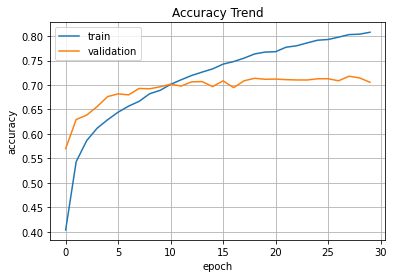

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

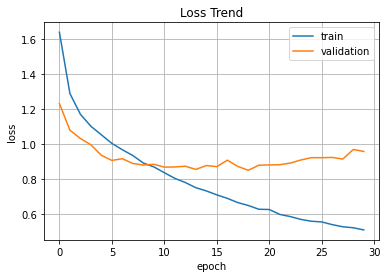

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()